<div style="text-align: center;">
  <span style="color: #4A90E2; font-size: 35px; font-weight: bold;">From Data to Dwellings:Decoding Amsterdam’s Housing Prices</span>
  <hr style="border: 1px dashed grey; width: 80%;"/>
</div>


### Introduction
<hr style="border: 1px solid Grey;"/>
The Amsterdam housing market has recently experienced significant fluctuations driven by various factors such as economic conditions, demographics, and housing policies. Understanding these factors is crucial for buyers, sellers, and investors.

This project examines predictors like **property area**, **number of rooms**, and **geographic location** (longitude and latitude) to explore their relationship with housing prices. Through **Exploratory Data Analysis (EDA)**, we aim to visualize these relationships and assess their impact on prices.

1. **Evaluate Predictors**: Assess the influence of key factors (area, rooms, location) on housing prices.
2. **Build Predictive Models**: Develop models to estimate house prices and forecast market trends.
3. **Gain Insights**: Apply statistical and machine learning techniques to provide actionable insights into the Amsterdam housing market.

By combining data-driven analysis with visualization and modeling, this project seeks to offer practical insights for decision-making in the housing market.

### ---------------------------------------  Importing Needed Libraries --------------------------------------

In [1]:
# import warnings
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# ------------------- Data Cleaning & Preprocessing ---------------------

### Dataset Description
<hr style="border: 1px solid Grey;"/>

The dataset provides detailed information on house prices in Amsterdam, Netherlands, as of August 2021. The data was sourced from **Pararius.nl** and supplemented with location coordinates obtained via the **Mapbox API**. It contains a total of **924 records** and includes the following features:

| Feature        | Description                                           |
|----------------|-------------------------------------------------------|
| **Address**    | Residential address                                  |
| **Zip**        | Residential zip code                                 |
| **Price**      | Residential price in Euros                           |
| **Area**       | House area in square meters                          |
| **Room**       | Number of rooms                                      |
| **Lon/Lat**    | Coordinates of the house’s location                  |

#### Data Cleaning
- There were **four missing values** in the `Price` field.  
- These records were removed to ensure accurate predictions, as missing values could skew results in learning models designed to predict house prices. 

In [2]:
df = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
df.head(10)


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041
8,9,"Postjeskade 41 2, Amsterdam",1058 DG,399000.0,49,3,4.854671,52.363471
9,10,"Van Ostadestraat 193 H, Amsterdam",1073 TM,300000.0,33,2,4.897142,52.353111


In [3]:
nan_count = df.isna().sum()
total_nan_rows = df.isna().any(axis=1).sum() 
print("NaN values per column:")
print(nan_count)
print(f"\nTotal number of rows with NaN values: {total_nan_rows}")


NaN values per column:
Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

Total number of rows with NaN values: 4


In [4]:
# Create a new dataframe without NaN values
data = df.dropna()

# Display the cleaned data (first 10 rows)
print("\nCleaned Data (first 10 rows):")
print(data.head(10))


Cleaned Data (first 10 rows):
   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   
5           6          De Wittenkade 134 I, Amsterdam  1051 AM  450000.0   
6           7           Pruimenstraat 18 B, Amsterdam  1033 KM  450000.0   
7           8           Da Costakade 32 II, Amsterdam  1053 WL  590000.0   
8           9             Postjeskade 41 2, Amsterdam  1058 DG  399000.0   
9          10       Van Ostadestraat 193 H, Amsterdam  1073 TM  300000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.9447

# ---------------------- Exploratory data Analysis -------------------------

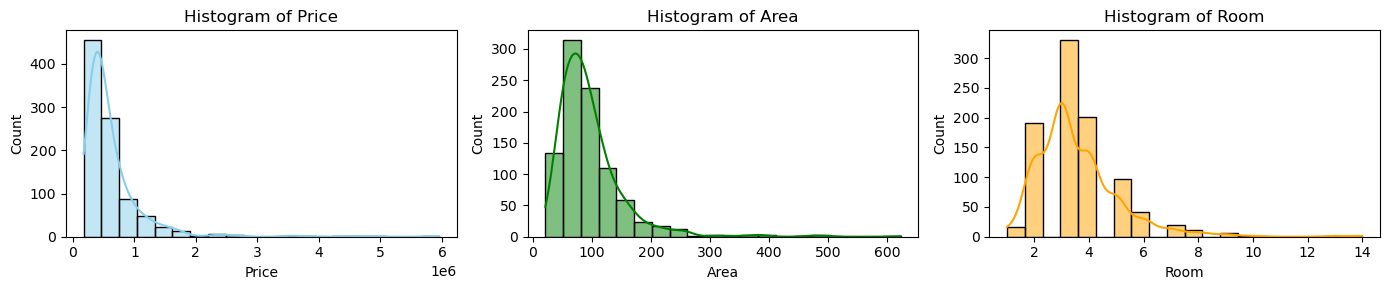

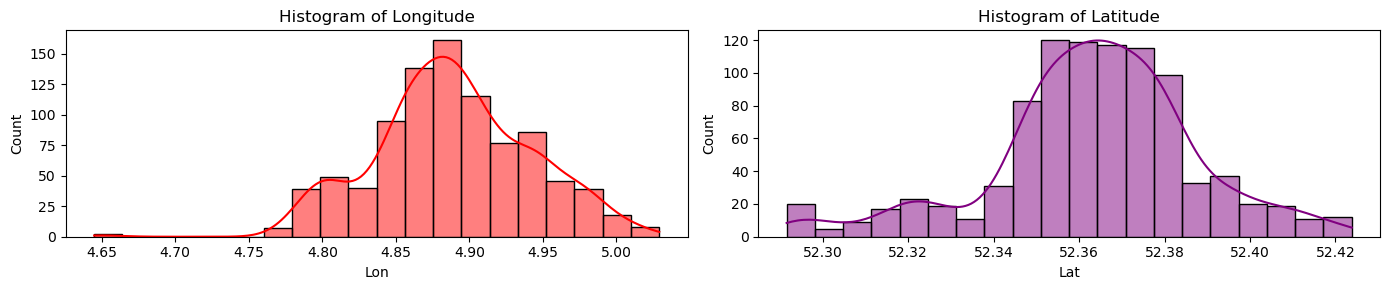

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3))

sns.histplot(data['Price'], bins=20, ax=axes[0], kde=True, color="skyblue")
axes[0].set_title("Histogram of Price")

sns.histplot(data['Area'], bins=20, ax=axes[1], kde=True, color="green")
axes[1].set_title("Histogram of Area")

sns.histplot(data['Room'], bins=20, ax=axes[2], kde=True, color="orange")
axes[2].set_title("Histogram of Room")

# Adjust layout
plt.tight_layout()
plt.show()

# Second row: Histograms for Longitude and Latitude
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

sns.histplot(data['Lon'], bins=20, ax=axes[0], kde=True, color="red")
axes[0].set_title("Histogram of Longitude")

sns.histplot(data['Lat'], bins=20, ax=axes[1], kde=True, color="purple")
axes[1].set_title("Histogram of Latitude")

# Adjust layout
plt.tight_layout()
plt.show()


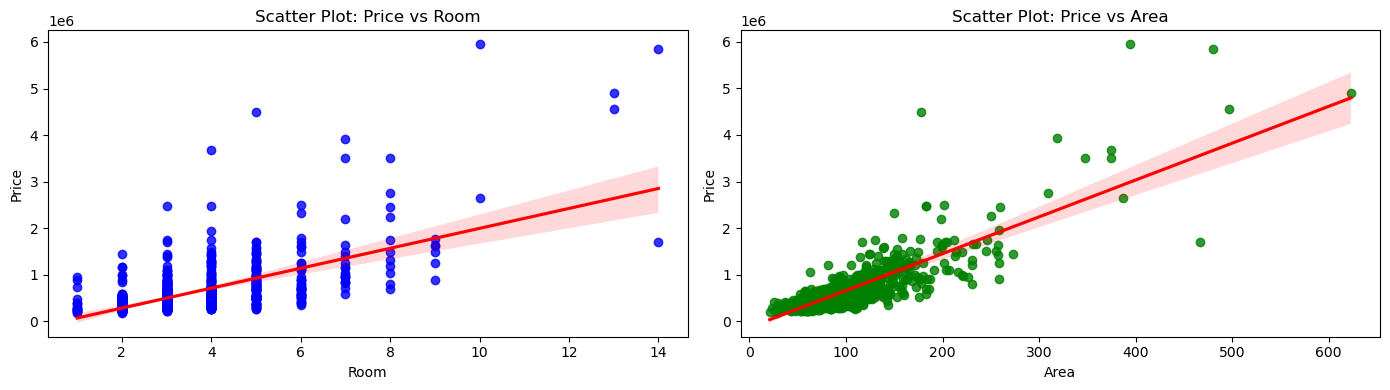

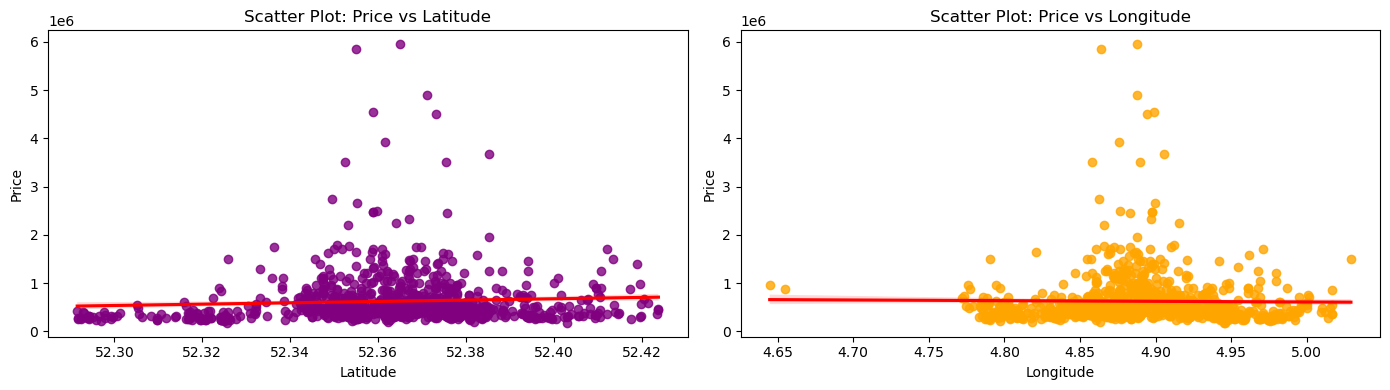

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# First row: Scatter plots for Price vs Room and Price vs Area
sns.regplot(x='Room', y='Price', data=data, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title("Scatter Plot: Price vs Room")
axes[0].set_xlabel("Room")
axes[0].set_ylabel("Price")

sns.regplot(x='Area', y='Price', data=data, ax=axes[1], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
axes[1].set_title("Scatter Plot: Price vs Area")
axes[1].set_xlabel("Area")
axes[1].set_ylabel("Price")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
# Second row: Scatter plots for Price vs Latitude and Price vs Longitude
sns.regplot(x='Lat', y='Price', data=data, ax=axes[ 0], scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
axes[ 0].set_title("Scatter Plot: Price vs Latitude")
axes[ 0].set_xlabel("Latitude")
axes[ 0].set_ylabel("Price")

sns.regplot(x='Lon', y='Price', data=data, ax=axes[ 1], scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
axes[ 1].set_title("Scatter Plot: Price vs Longitude")
axes[ 1].set_xlabel("Longitude")
axes[1].set_ylabel("Price")

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:


# Create a scatter matrix (pair plot) for the selected columns
fig = px.scatter_matrix(
    data,
    dimensions=["Price", "Room", "Area", "Lon", "Lat"],  # Columns to be plotted
    color="Price",  # Use 'Price' for color coding
    title="Interactive Scatter Matrix Plot of Amsterdam House Data",
    labels={
        "Price": "Price (€)",
        "Room": "Number of Rooms",
        "Area": "Area (sqm)",
        "Lon": "Longitude",
        "Lat": "Latitude"
    },
    color_continuous_scale="Viridis",  # Color scale to represent 'Price'
    template="plotly"
)

# Update layout for better readability
fig.update_layout(
    title_font_size=20,
    showlegend=False  # Hide the legend for clarity in the scatter matrix
)

# Show the interactive plot
fig.show()


In [8]:


# Create an interactive scatter plot
fig = px.scatter(
    data,
    x="Lon",
    y="Lat",
    size="Area",            # Size of markers represents property area
    color="Price",          # Color of markers represents property price
    hover_name="Address",   # Hover text shows property address
    hover_data={"Price": True, "Area": True, "Zip": True},  # Additional info on hover
    title="Interactive Map of House Locations, Price, and Area",
    labels={"Lon": "Longitude", "Lat": "Latitude"},
    template="plotly"
)

# Improve layout
fig.update_layout(
    title_font_size=20,
    legend_title=dict(text="Price (€)"),
    xaxis=dict(title="Longitude"),
    yaxis=dict(title="Latitude"),
)

# Show the interactive plot
fig.show()



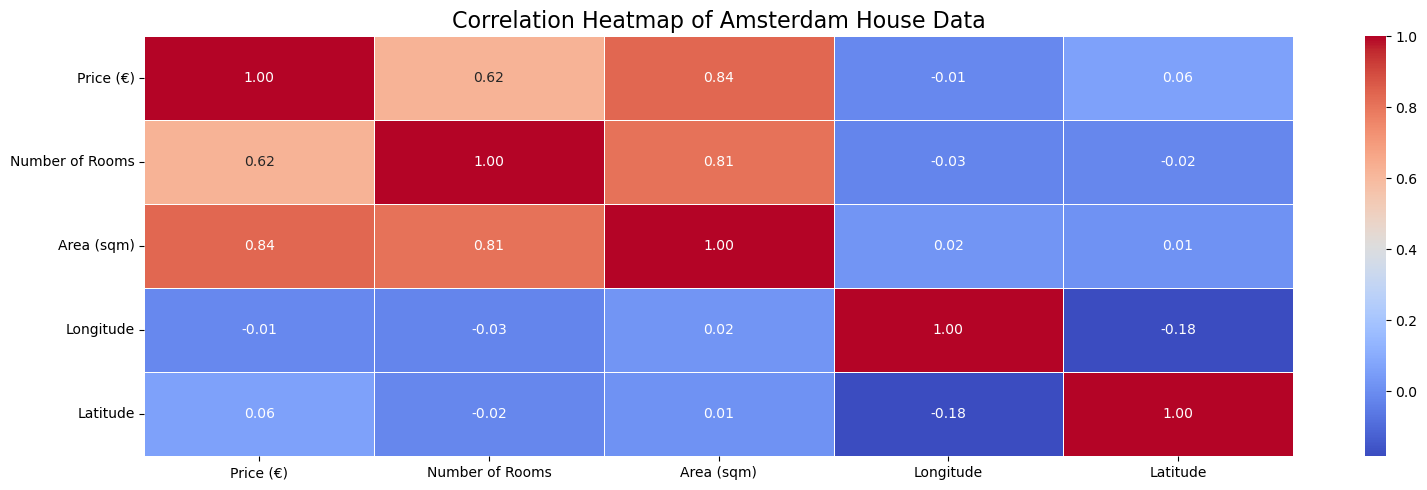

In [9]:
data_renamed = data.rename(columns={
    "Price": "Price (€)",
    "Room": "Number of Rooms",
    "Area": "Area (sqm)",
    "Lon": "Longitude",
    "Lat": "Latitude"
})

# Select relevant columns
correlation_data = data_renamed[["Price (€)", "Number of Rooms", "Area (sqm)", "Longitude", "Latitude"]]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the values to 2 decimal places
    cmap="coolwarm",       # Colormap for better visual appeal
    linewidths=0.5         # Add space between cells
)

# Add a title
plt.title("Correlation Heatmap of Amsterdam House Data", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


# ------------------- Feature Selection and Training ----------------------

In [ ]:
X = data_renamed[['Number of Rooms', 'Area (sqm)', 'Longitude', 'Latitude']]  # Features
y = data_renamed['Price (€)']

# Initialize the model
model = LinearRegression()

# Train-test split without feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the regression model with all features
model.fit(X_train_scaled, y_train)

# Get coefficients for all features
coefficients_all = model.coef_

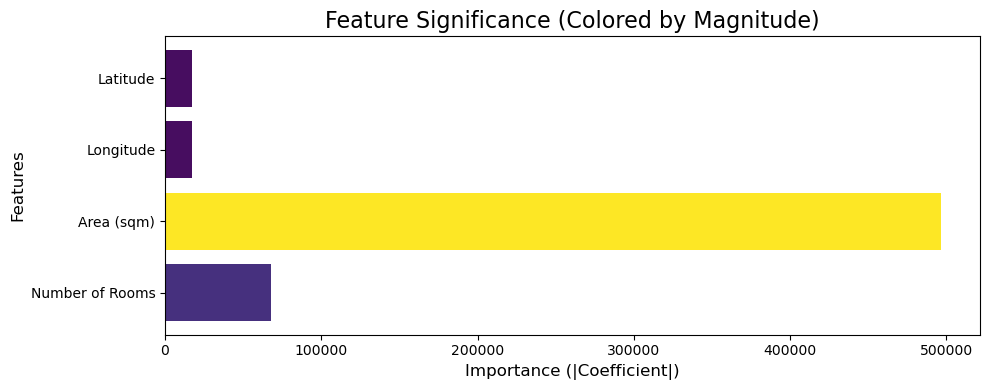

In [25]:
feature_names = ['Number of Rooms', 'Area (sqm)', 'Longitude', 'Latitude']
coefficients_all = np.abs(model.coef_)  # Get absolute coefficients for importance

# Assign colors based on magnitude
colors = plt.cm.viridis(coefficients_all / coefficients_all.max())  # Normalize to max value for color mapping

# Plot feature significance as a horizontal bar chart
plt.figure(figsize=(10, 4))
plt.barh(feature_names, coefficients_all, color=colors)
plt.title("Feature Significance (Colored by Magnitude)", fontsize=16)
plt.xlabel("Importance (|Coefficient|)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()



# ------------------------------ Evaluation ---------------------------------


In [15]:
# Step 6: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 164755.88559390572
Mean Squared Error (MSE): 60958225226.285164
R-squared (R2): 0.7998106641653244


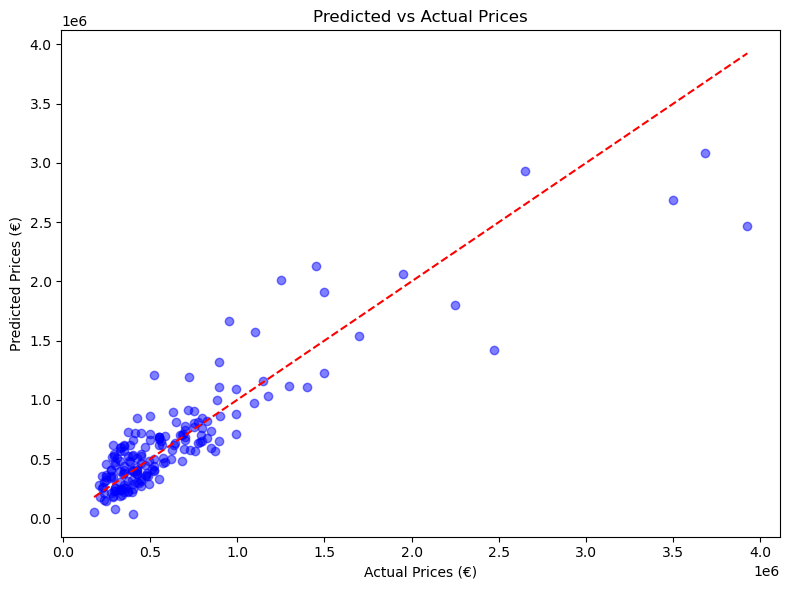

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices (€)')
plt.ylabel('Predicted Prices (€)')
plt.tight_layout()
plt.show()

In [ ]:
# import joblib
# joblib.dump(model, 'reg_model.pkl')

['reg_model.pkl']